In [1]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import one_to_three

warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

In [2]:
# plt.rcParams['figure.figsize'] = [16.18033, 10]
plt.rcParams['figure.figsize'] = 0.5*np.array([16.18033, 10])
# def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation):
#     # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
#     # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
#     gamma = iteration_gamma
#     gamma = -gamma  # caused by tradition.
#     # convert gamma to gamma used by simulation
#     with open(gamma_for_simulation, "w") as out:
#         c = 0
#         for i in range(20):
#             for j in range(i, 20):
#                 out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
#                 c += 1
#         out.write("\n")
#         for i in range(20):
#             for j in range(i, 20):
#                 # protein, water
#                 out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
#                 c += 1

res_type_map = {
    'A': 0,
    'C': 4,
    'D': 3,
    'E': 6,
    'F': 13,
    'G': 7,
    'H': 8,
    'I': 9,
    'K': 11,
    'L': 10,
    'M': 12,
    'N': 2,
    'P': 14,
    'Q': 5,
    'R': 1,
    'S': 15,
    'T': 16,
    'V': 19,
    'W': 17,
    'Y': 18
}
# res_type_map = gamma_se_map_1_letter = {   'A': 0,  'R': 1,  'N': 2,  'D': 3,  'C': 4,
#                             'Q': 5,  'E': 6,  'G': 7,  'H': 8,  'I': 9,
#                             'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14,
#                             'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
res_type_map_letters = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G',
                        'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

inverse_res_type_map = dict(list(zip(list(range(20)), res_type_map_letters)))

def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation, burial_gamma_for_simulation=None):
    # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
    # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
    gamma = iteration_gamma
    gamma = -gamma  # caused by tradition.
    # convert gamma to gamma used by simulation
    with open(gamma_for_simulation, "w") as out:
        c = 0
        for i in range(20):
            for j in range(i, 20):
                out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
                c += 1
        out.write("\n")
        for i in range(20):
            for j in range(i, 20):
                # protein, water
                out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
                c += 1
    if burial_gamma_for_simulation:
        rhoGamma = pd.DataFrame(gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
        rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
        rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
        rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
        g = rhoGamma[["rho1", "rho2", "rho3"]].values
        np.savetxt(burial_gamma_for_simulation, g, fmt='%7.4f')




In [45]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)







In [49]:
phi_i_decoy_reshaped = np.loadtxt("/Users/weilu/Research/server/feb_2019/optimization_iter1/phis/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_phi_decoy_all_summary.txt")




In [50]:
phi_i_decoy_reshaped.shape

(36000, 690)

In [59]:
phi_i_protein_i_decoy = np.reshape(phi_i_decoy_reshaped, (6, num_decoys, total_phis))

In [141]:

def get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, noise_iterations=10, relative_error_threshold=0.5, mode=1):
    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
    np.random.seed(10)
    cutoff_modes = []
    noisy_lamb_list = []
    for i_noise in range(noise_iterations):
        noisy_B = np.zeros((total_phis, total_phis))
        for i in range(total_phis):
            for j in range(i, total_phis):
#                 random_B_ij = np.random.normal(
#                     loc=half_B[i][j], scale=std_half_B[i][j])
                if mode == 1:
                    random_B_ij = np.random.normal(
                        loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys))
#                 random_B_ij = np.random.normal(
#                     loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys)**0.5)
                noisy_B[i][j] = noisy_B[j][i] = random_B_ij - \
                    other_half_B[i][j]

        noisy_lamb, noisy_P = np.linalg.eig(noisy_B)
        noisy_lamb, noisy_P = sort_eigenvalues_and_eigenvectors(
            noisy_lamb, noisy_P)
        noisy_lamb_list.append(noisy_lamb)
        try:
            cutoff_mode = np.where(
                np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)[0][0]
        except IndexError:
            cutoff_mode = len(lamb)
        cutoff_modes.append(cutoff_mode)

    cutoff_mode = min(cutoff_modes)
#     cutoff_mode = 10
    print("min cutoff_mode", cutoff_mode)

    filtered_lamb = np.copy(lamb)
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(
        filtered_lamb, cutoff_mode, P)

    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)
    return filtered_gamma, filtered_B, filtered_lamb, P, lamb, noisy_lamb_list


def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors





In [39]:
total_phis = 690
num_decoys = 6000


In [ ]:
plt.plot(lamb)




In [136]:
f"{datetime.date.today()}"

'2019-02-27'

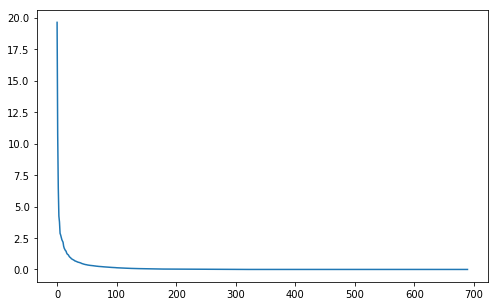

In [129]:
plt.plot(lamb)




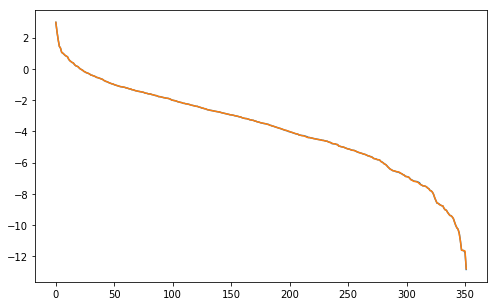

In [147]:
plt.plot(np.log(lamb))
plt.plot(np.log(noisy_lamb_list[0]))


# scale=std_half_B[i][j] / float(num_decoys)

In [142]:
filtered_gamma, filtered_B, filtered_lamb, P, lamb, noisy_lamb_list = get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys)

min cutoff_mode 352


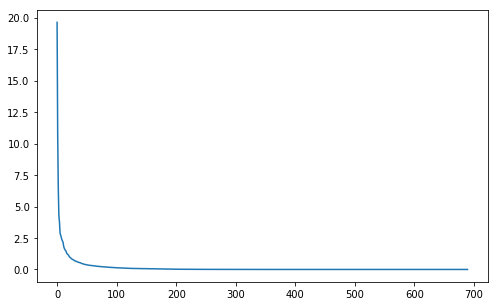

In [146]:
plt.plot(noisy_lamb_list[0])

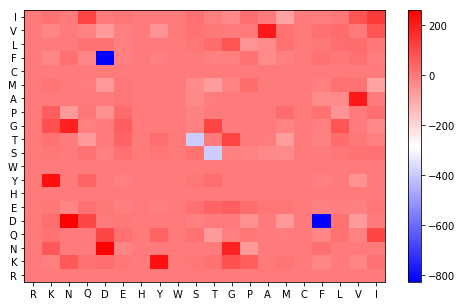

In [145]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

In [111]:
rhoGamma = pd.DataFrame(filtered_gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,-365.862228,-360.488469,-342.263698,0,A
1,ARG,0.000000,0.000000,0.000000,1,R
2,ASN,-0.894863,10.392739,-429.097514,2,N
3,ASP,4.380072,-1.398988,-27.005112,3,D
4,CYS,0.000000,0.000000,0.000000,4,C
5,GLN,-43.100760,-46.437459,-51.095970,5,Q
6,GLU,24.715676,17.086714,0.943423,6,E
7,GLY,26.455361,24.474262,-48.834629,7,G
8,HIS,0.000000,0.000000,0.000000,8,H
9,ILE,-134.066163,-6.065951,-9.311017,9,I


# scale=std_half_B[i][j]

In [113]:
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys)

min cutoff_mode 0


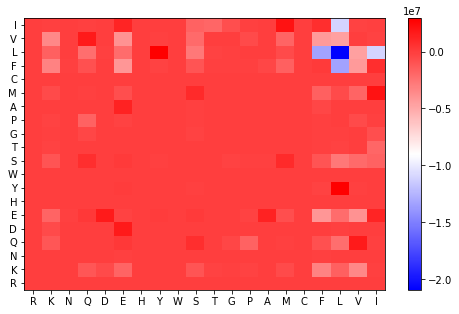

In [114]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

In [115]:
rhoGamma = pd.DataFrame(filtered_gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,-1.681267e+05,7.540282e+05,-5.731475e+05,0,A
1,ARG,0.000000e+00,0.000000e+00,0.000000e+00,1,R
2,ASN,2.239445e+05,-8.223826e+04,-1.738193e+02,2,N
3,ASP,9.690427e+04,-8.621003e+05,9.340615e+05,3,D
4,CYS,0.000000e+00,0.000000e+00,0.000000e+00,4,C
5,GLN,1.046045e+06,-1.230402e+06,-3.665197e+05,5,Q
6,GLU,1.964223e+06,-1.297040e+06,-2.755688e+05,6,E
7,GLY,6.950600e+04,2.624889e+05,-9.994610e+02,7,G
8,HIS,0.000000e+00,0.000000e+00,0.000000e+00,8,H
9,ILE,2.004788e+06,-2.916688e+05,-7.757121e+05,9,I


# scale=std_half_B[i][j] / float(num_decoys)**0.5

In [120]:
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys)

min cutoff_mode 181


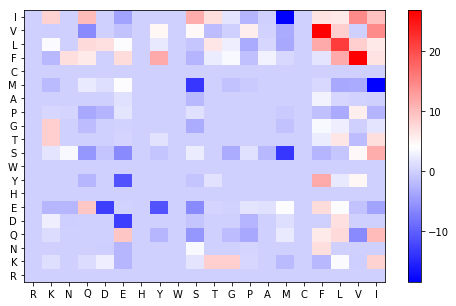

In [121]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

In [122]:
rhoGamma = pd.DataFrame(filtered_gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,-2.256962,-0.046942,2.392771,0,A
1,ARG,0.000000,0.000000,0.000000,1,R
2,ASN,-5.158056,2.817575,0.009040,2,N
3,ASP,-0.150601,1.049425,-3.470013,3,D
4,CYS,0.000000,0.000000,0.000000,4,C
5,GLN,0.673608,1.374643,-1.233597,5,Q
6,GLU,-2.532429,-3.446692,-5.571281,6,E
7,GLY,1.349413,2.074442,-0.273705,7,G
8,HIS,0.000000,0.000000,0.000000,8,H
9,ILE,-21.182503,8.283022,2.161626,9,I


In [126]:
pre = "/Users/weilu/Research/server/feb_2019/optimization/gammas/"
pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
Gamma_name = pp + "_gamma"
Gamma = np.loadtxt(pre+Gamma_name)

iter_gamma = 0.5 * filtered_gamma + 0.5 * Gamma
gamma_for_simulation = "/Users/weilu/Research/server/feb_2019/optimization_iter1/iteration_gamma.dat"
burial_gamma_for_simulation = "/Users/weilu/Research/server/feb_2019/optimization_iter1/iteration_burial_gamma.dat"
gamma_format_convertion_iteration_to_simulation(iter_gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)






In [125]:
rhoGamma = pd.DataFrame(Gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,-0.14009,0.09679,0.55265,0,A
1,ARG,-0.25496,-0.49751,-0.98630,1,R
2,ASN,-0.25682,-0.46232,-0.87701,2,N
3,ASP,-0.27643,-0.77906,-1.73890,3,D
4,CYS,0.17467,1.26307,3.17942,4,C
5,GLN,-0.28242,-0.61399,-1.26118,5,Q
6,GLU,-0.31422,-0.86138,-1.97530,6,E
7,GLY,-0.13472,-0.21850,-0.30654,7,G
8,HIS,-0.17776,-0.18548,-0.18941,8,H
9,ILE,0.18318,1.29716,3.40786,9,I


In [158]:
pdb_file = "/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/all_simulations/1ctf/1ctf/crystal_structure.pdb"
chain_name = "A"
parser = PDBParser()
structure = parser.get_structure('X', pdb_file)
chain = list(structure[0][chain_name])
n = len(chain)
rg = 0.0
for i, residue_i in enumerate(chain):
#     print(i, residue_i)
    for j, residue_j in enumerate(chain[i+1:]):
#         print(j)
        r = residue_i["CA"] - residue_j["CA"]
        rg += r**2
(rg/(n**2))**0.5
#         Rg = Rg + rsq

10.541718494708263

In [160]:
p = "1enh"
p = "1fc2"
def computeRg(p):
    pdb_file = f"/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/all_simulations/{p}/{p}/crystal_structure.pdb"
    chain_name = "A"
    parser = PDBParser()
    structure = parser.get_structure('X', pdb_file)
    chain = list(structure[0][chain_name])
    n = len(chain)
    rg = 0.0
    for i, residue_i in enumerate(chain):
    #     print(i, residue_i)
        for j, residue_j in enumerate(chain[i+1:]):
    #         print(j)
            r = residue_i["CA"] - residue_j["CA"]
            rg += r**2
    return (rg/(n**2))**0.5

9.55076700635943

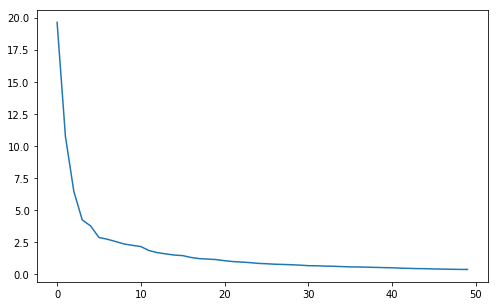

In [102]:
plt.plot(filtered_lamb[:50])

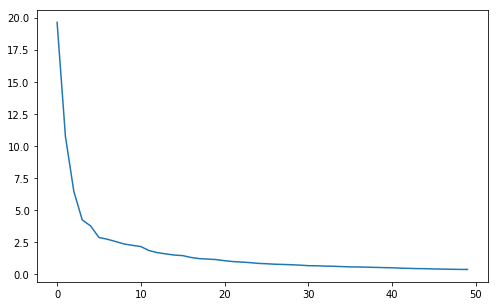

In [89]:
plt.plot(lamb[:50])


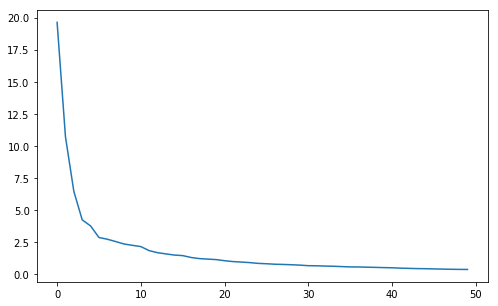

In [83]:
plt.plot(Lamb[:50])

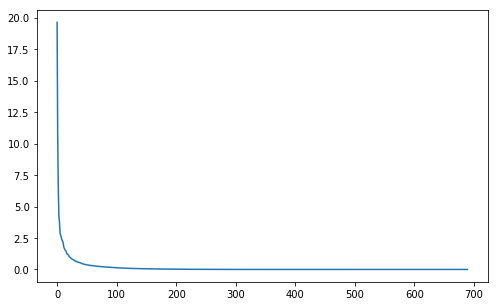

In [81]:
plt.plot(Lamb_filtered)

In [ ]:
std_half_B

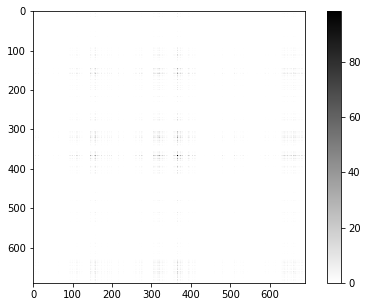

In [148]:
plt.imshow(std_half_B, cmap="binary")
plt.colorbar()

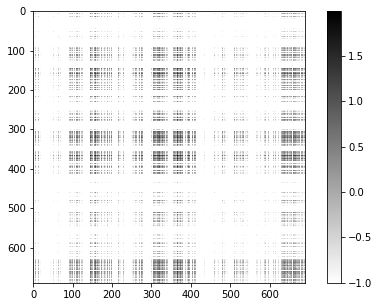

In [96]:
plt.imshow(np.log10(std_half_B+0.1), cmap="binary")
plt.colorbar()

In [42]:
std_half_B

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.27402, 0.10465],
       [0.     , 0.     , 0.     , ..., 0.     , 0.10465, 0.28193]])

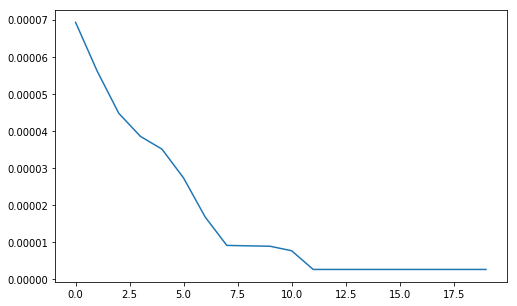

In [35]:
plt.plot(filtered_lamb[340:360])

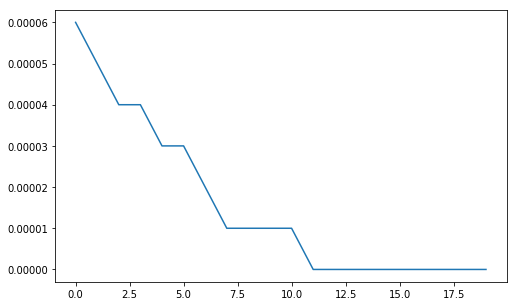

In [33]:
plt.plot(Lamb[340:360])

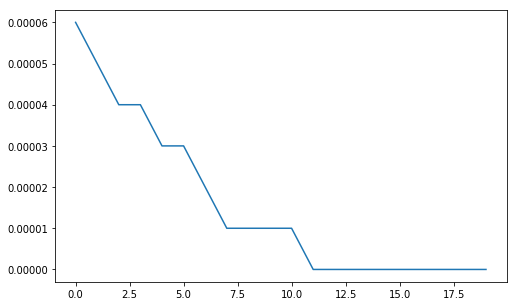

In [34]:
plt.plot(Lamb_filtered[340:360])

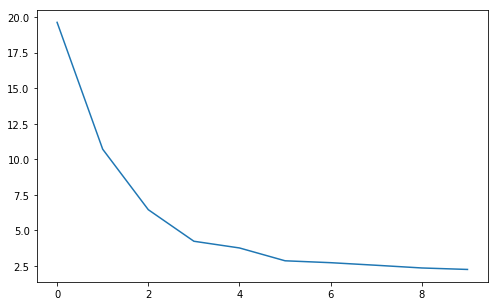

In [24]:
plt.plot(Lamb_filtered[:10])

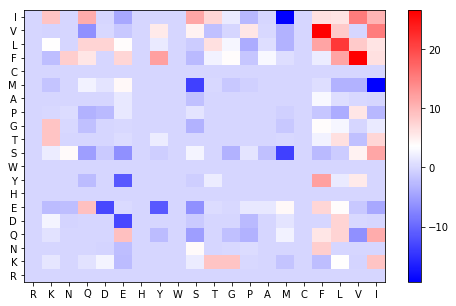

In [103]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

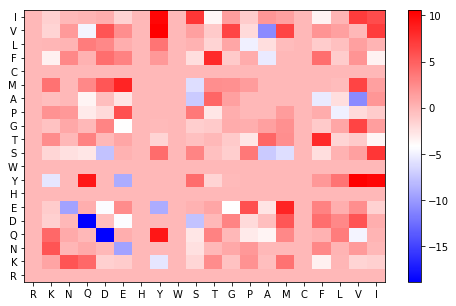

In [104]:
plot_contact_well(filtered_gamma[210:420], inferBound=True, invert_sign=False)

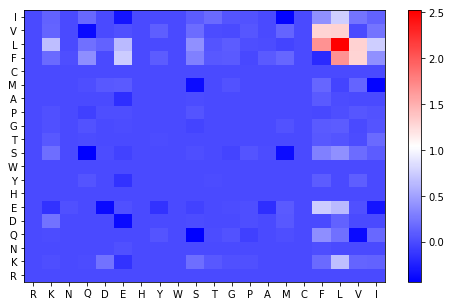

In [91]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

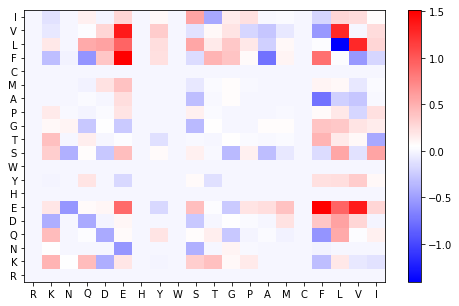

In [92]:
plot_contact_well(filtered_gamma[210:420], inferBound=True, invert_sign=False)

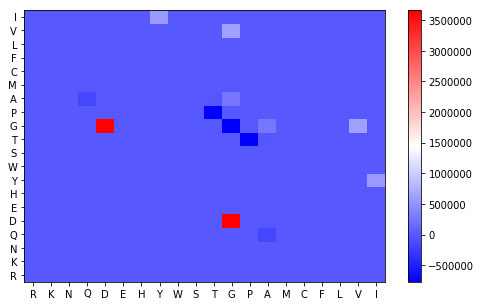

In [47]:
plot_contact_well(Gamma[:210], inferBound=True, invert_sign=False)

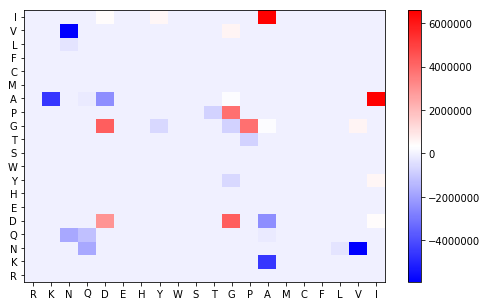

In [46]:
plot_contact_well(Gamma_filtered[:210], inferBound=True, invert_sign=False)

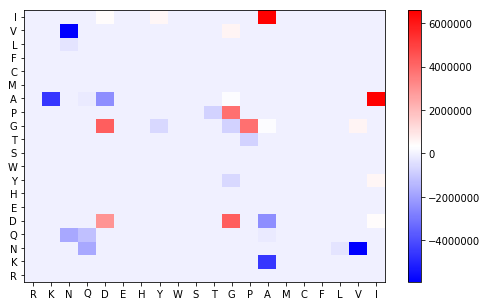

In [18]:
plot_contact_well(Gamma_filtered[:210], inferBound=True, invert_sign=False)

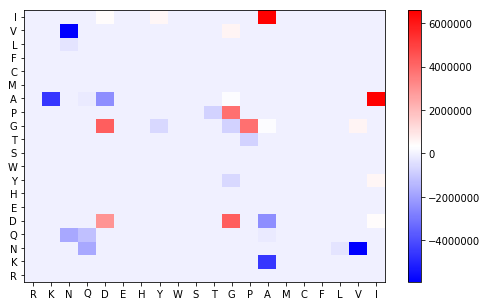

In [15]:
plot_contact_well(Gamma_filtered[:210], inferBound=True, invert_sign=False)

In [105]:
rhoGamma = pd.DataFrame(filtered_gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,-2.170222,-0.052178,2.328316,0,A
1,ARG,0.000000,0.000000,0.000000,1,R
2,ASN,-5.151723,2.799517,0.008587,2,N
3,ASP,-0.213356,0.993850,-3.581864,3,D
4,CYS,0.000000,0.000000,0.000000,4,C
5,GLN,0.717076,1.384744,-1.266806,5,Q
6,GLU,-2.852692,-3.773215,-5.929980,6,E
7,GLY,1.441271,2.158153,-0.307456,7,G
8,HIS,0.000000,0.000000,0.000000,8,H
9,ILE,-22.295686,8.253337,2.149129,9,I


In [93]:
rhoGamma = pd.DataFrame(filtered_gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,0.017200,-0.162550,0.144266,0,A
1,ARG,0.000000,0.000000,0.000000,1,R
2,ASN,-0.044303,0.020250,0.000064,2,N
3,ASP,-0.108319,0.269989,-0.196254,3,D
4,CYS,0.000000,0.000000,0.000000,4,C
5,GLN,0.004084,-0.082408,0.117687,5,Q
6,GLU,0.008938,0.162961,-0.259982,6,E
7,GLY,-0.019093,-0.043874,0.001203,7,G
8,HIS,0.000000,0.000000,0.000000,8,H
9,ILE,-0.372318,0.184558,0.078965,9,I


In [48]:
rhoGamma = pd.DataFrame(Gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,14.71474,22.56941,34.11893,0,A
1,ARG,0.00000,0.00000,0.00000,1,R
2,ASN,5.43588,13.60091,-234.60303,2,N
3,ASP,8.10523,6.06249,-11.54394,3,D
4,CYS,0.00000,0.00000,0.00000,4,C
5,GLN,-19.56876,-21.08062,-20.14578,5,Q
6,GLU,16.20551,10.71726,-1.86554,6,E
7,GLY,19.39778,19.56108,-45.40998,7,G
8,HIS,0.00000,0.00000,0.00000,8,H
9,ILE,-133.13205,-8.60249,-7.60368,9,I


In [16]:
rhoGamma = pd.DataFrame(Gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,14.71474,22.56941,34.11893,0,A
1,ARG,0.00000,0.00000,0.00000,1,R
2,ASN,5.43588,13.60091,-234.60303,2,N
3,ASP,8.10523,6.06249,-11.54394,3,D
4,CYS,0.00000,0.00000,0.00000,4,C
5,GLN,-19.56876,-21.08062,-20.14578,5,Q
6,GLU,16.20551,10.71726,-1.86554,6,E
7,GLY,19.39778,19.56108,-45.40998,7,G
8,HIS,0.00000,0.00000,0.00000,8,H
9,ILE,-133.13205,-8.60249,-7.60368,9,I


In [17]:
rhoGamma = pd.DataFrame(Gamma_filtered[630:].astype(float).reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,14.47439,23.18237,34.69187,0,A
1,ARG,0.00000,0.00000,0.00000,1,R
2,ASN,5.31208,13.52831,-236.37338,2,N
3,ASP,7.82298,5.81821,-11.75434,3,D
4,CYS,0.00000,0.00000,0.00000,4,C
5,GLN,-19.49472,-21.03906,-20.31585,5,Q
6,GLU,16.01924,10.53254,-2.05376,6,E
7,GLY,19.47174,19.55014,-42.52611,7,G
8,HIS,0.00000,0.00000,0.00000,8,H
9,ILE,-134.70728,-8.48370,-7.48450,9,I


In [7]:
Gamma_filtered[630:]

array([   3.21072-0.j,    0.     +0.j,   -2.9014 -0.j,   28.53352+0.j,
          0.     +0.j,   -8.82379+0.j,  -18.83807+0.j,   22.90899+0.j,
          0.     +0.j, -109.2139 +0.j,  -40.6199 +0.j,   -9.55283+0.j,
        -47.52313-0.j, -119.90648+0.j,   -2.0399 +0.j,  -28.04518-0.j,
          6.40333-0.j,    0.     +0.j,   -2.12887-0.j,  -10.73993-0.j,
         22.74298-0.j,    0.     +0.j,   14.77741-0.j,   44.28591+0.j,
          0.     +0.j,  -10.29564+0.j,  -24.09454+0.j,   16.39737+0.j,
          0.     +0.j,    0.93591+0.j,  -20.3722 +0.j,   -3.80766+0.j,
        -36.72318-0.j,  -40.89325+0.j,   -8.69506+0.j,  -38.07933-0.j,
         -5.81367-0.j,    0.     +0.j,   24.40816-0.j,  -14.3642 -0.j,
         43.00473+0.j,    0.     +0.j,    0.14576+0.j,   33.94646+0.j,
          0.     +0.j,  -10.56024-0.j,  -21.91772+0.j,  -17.05574+0.j,
          0.     +0.j,   -5.80952+0.j,    1.78923+0.j,   -9.09993+0.j,
         28.37369-0.j,  -34.1822 +0.j,  -41.19861+0.j,  -66.31823-0.j,
      

In [ ]:
plot_contact_well(Gamma_filtered[630:], inferBound=True, invert_sign=False)